In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as mtp 


In [13]:
dataset = pd.read_csv("datasets/Mall_Customers.csv")
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
X = dataset.iloc[:,[3,4]].values

In [15]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [16]:
from sklearn.cluster import KMeans

In [17]:
wcss_list = []

for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
    

In [18]:
wcss_list

[1673624.5000000002,
 440146.70193894394,
 350813.66784874955,
 257469.24955819763,
 226845.86790239363,
 160901.9291550462,
 128434.20105540697,
 99238.24807042128,
 78123.1679864186,
 69006.68032028357]

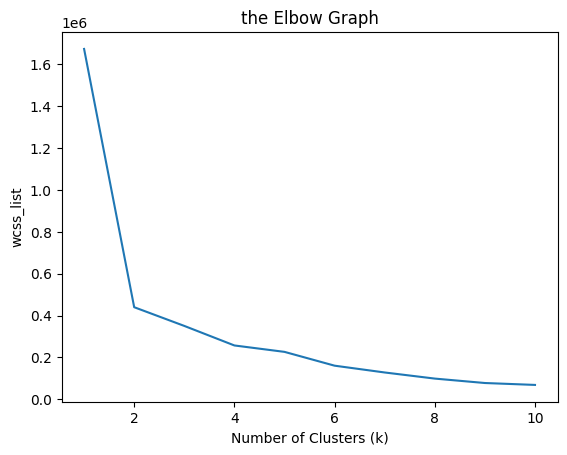

In [19]:
mtp.plot(range(1,11),wcss_list)
mtp.title("the Elbow Graph")
mtp.xlabel("Number of Clusters (k)")
mtp.ylabel("wcss_list")

mtp.show()

In [20]:
kmeans = KMeans(n_clusters = 4,init = 'k-means++',random_state = 42)
y_predict = kmeans.fit_predict(X)

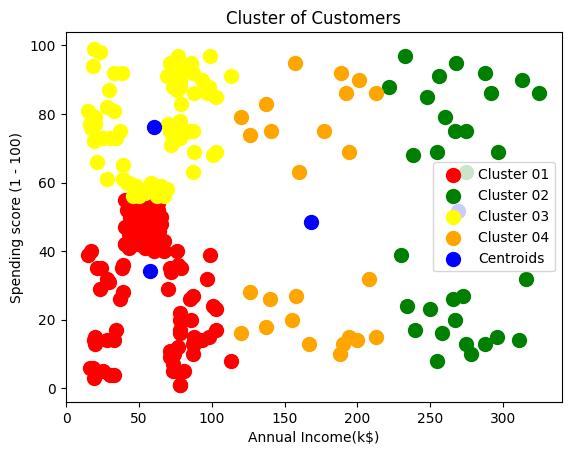

In [21]:
mtp.scatter(X[y_predict == 0,0],X[y_predict == 0,1], s = 100, c = 'red', label = "Cluster 01")

mtp.scatter(X[y_predict == 1,0],X[y_predict == 1,1], s = 100, c = "green", label = "Cluster 02")
mtp.scatter(X[y_predict == 2,0],X[y_predict == 2,1],s = 100, c = "yellow", label = "Cluster 03")
mtp.scatter(X[y_predict == 3,0],X[y_predict == 3,1], s = 100, c = "orange", label = "Cluster 04")
mtp.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 100, c = "blue" , label = "Centroids")

mtp.title("Cluster of Customers")
mtp.xlabel("Annual Income(k$)")
mtp.ylabel("Spending score (1 - 100)")
mtp.legend()
mtp.show()